In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/daily-min-temperatures.csv', parse_dates=['Date'])

In [4]:
df = df.set_index('Date')

In [5]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [6]:
df.tail()

,Temp
Date,
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [8]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [10]:
df.corr()

,Temp
Temp,1.0


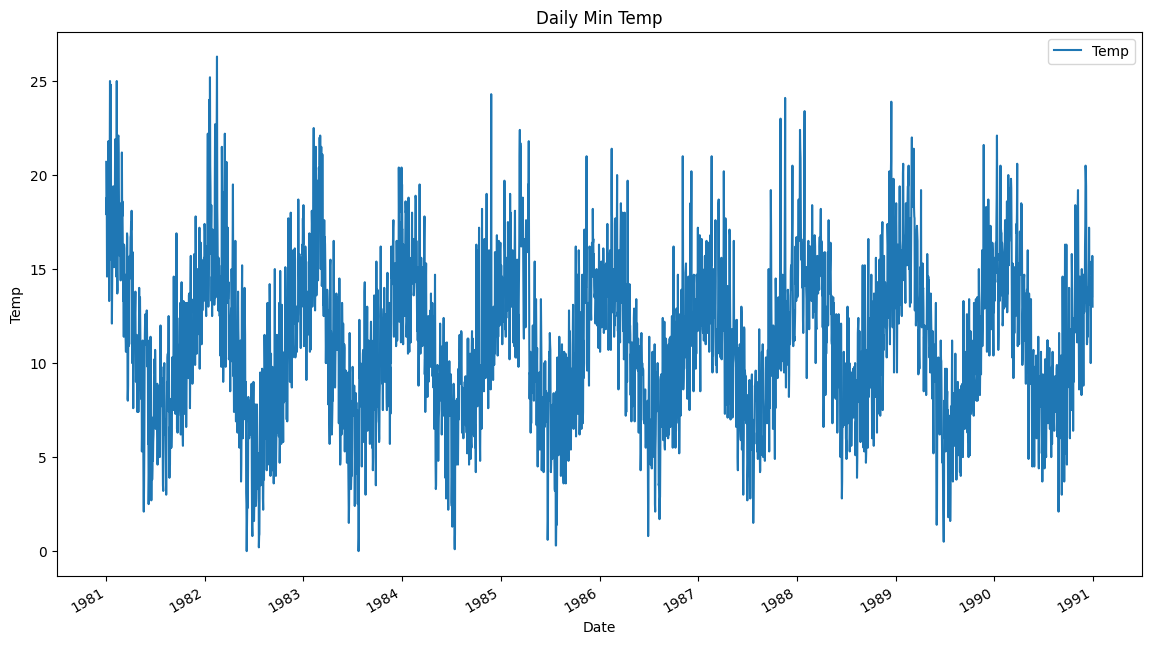

In [11]:
df.plot(title='Daily Min Temp', figsize=(14,8))
plt.xlabel('Date')
plt.ylabel('Temp')
plt.show()

In [12]:
series = pd.read_csv('/content/daily-min-temperatures.csv', header=0, index_col = 0, parse_dates= True)

In [13]:
diff_series = series.diff(periods=1)

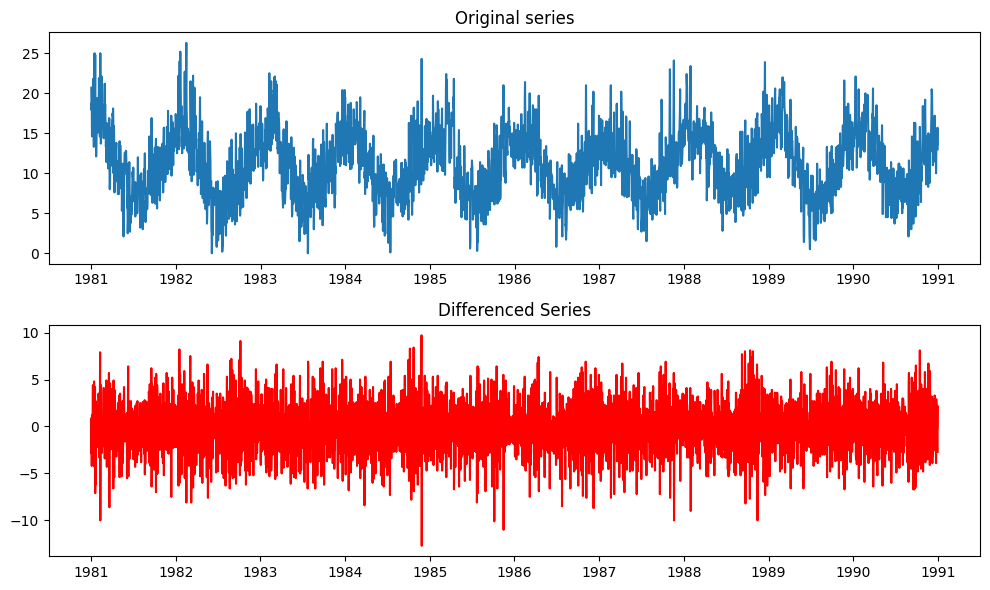

In [17]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(series)
plt.title("Original series")


plt.subplot(2,1,2)
plt.plot(diff_series,color='red')
plt.title("Differenced Series")


plt.tight_layout()
plt.show()

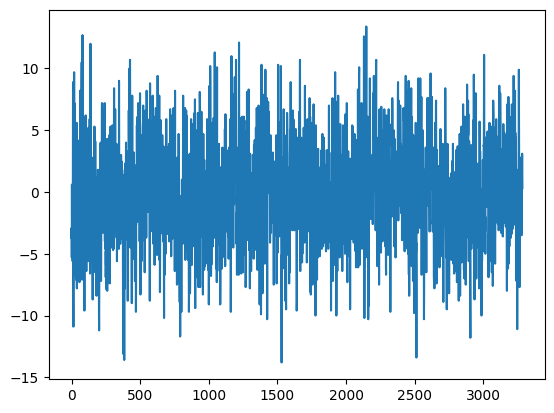

In [18]:
X= series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
  value = X[i] - X[i- days_in_year]
  diff.append(value)
plt.plot(diff)
plt.show()


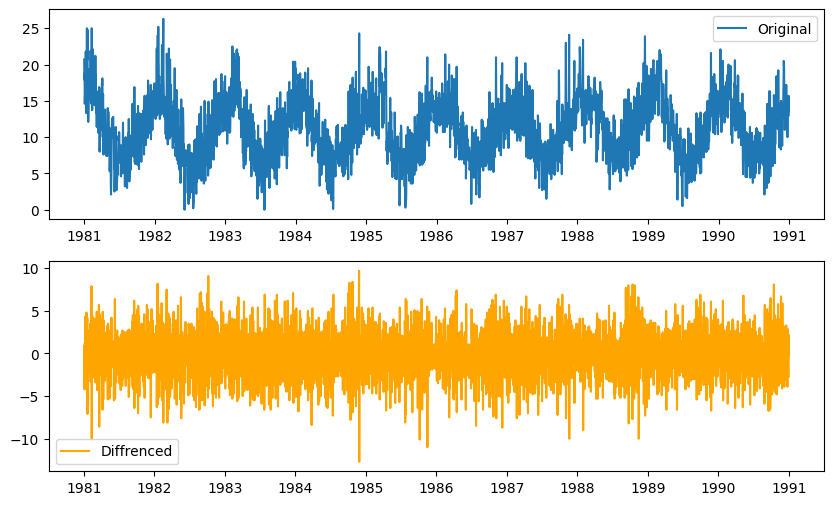

In [23]:
df['diff'] = df['Temp'].diff(periods=1)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(df.index, df['Temp'], label='Original')
plt.legend()
plt.subplot(2,1,2)
plt.plot(df.index, df['diff'], label='Diffrenced', color='orange')
plt.legend()
plt.show()

In [24]:
from numpy import polyfit
a = [ i%365 for i in range(0,len(series))]
b = series.values
degree = 4
coef = polyfit(a, b, degree)
curve= list()
for i in range(len(a)):
  value = coef[-1]
  for d in range(degree):
    value += a[i]**(degree-d) * coef[d]
    curve.append(value)
values = series.values
diff = list()

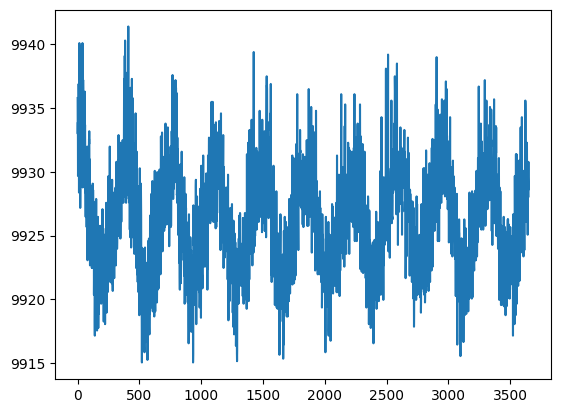

In [25]:
for i in range(len(values)):
  value = values[i] - curve[i]
  diff.append(value)
plt.plot(diff)
plt.show()